<a href="https://colab.research.google.com/github/beqbuulaat/Movie-genre-classifier-/blob/main/Movie_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

data = [
    {'description': 'A former soldier must stop a nuclear threat.', 'genre': 'Action'},
    {'description': 'A detective chases criminals through city streets.', 'genre': 'Action'},
    {'description': 'A rogue agent battles an international cartel.', 'genre': 'Action'},
    {'description': 'A man accidentally joins a dance competition.', 'genre': 'Comedy'},
    {'description': 'Two best friends open a failing bakery.', 'genre': 'Comedy'},
    {'description': 'A family reunion turns into chaos and laughter.', 'genre': 'Comedy'},
    {'description': 'A young woman struggles with her identity.', 'genre': 'Drama'},
    {'description': 'An old man returns to his hometown after 40 years.', 'genre': 'Drama'},
    {'description': 'A couple navigates through a turbulent relationship.', 'genre': 'Drama'},
    {'description': 'A boy discovers a secret magical kingdom.', 'genre': 'Fantasy'},
    {'description': 'A warrior seeks a lost relic to save his land.', 'genre': 'Fantasy'},
    {'description': 'A prophecy forces a girl into a battle of good and evil.', 'genre': 'Fantasy'},
    {'description': 'Aliens arrive on Earth with a mysterious message.', 'genre': 'Sci-Fi'},
    {'description': 'A hacker finds out reality is a simulation.', 'genre': 'Sci-Fi'},
    {'description': 'A scientist creates a machine to travel through time.', 'genre': 'Sci-Fi'},
]

import random
while len(data) < 100:
    data.append(random.choice(data))

df = pd.DataFrame(data)
X = df['description']
y = df['genre']

df.head()

,description,genre
0,A former soldier must stop a nuclear threat.,Action
1,A detective chases criminals through city stre...,Action
2,A rogue agent battles an international cartel.,Action
3,A man accidentally joins a dance competition.,Comedy
4,Two best friends open a failing bakery.,Comedy


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1, 2))

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.metrics import accuracy_score

# Предсказываем жанры на тестовой выборке
y_pred = model.predict(X_test_vec)

accuracy = accuracy_score(y_test, y_pred)
print(f"📊 Accuracy: {accuracy:.2f}")

📊 Accuracy: 0.95


<Figure size 800x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


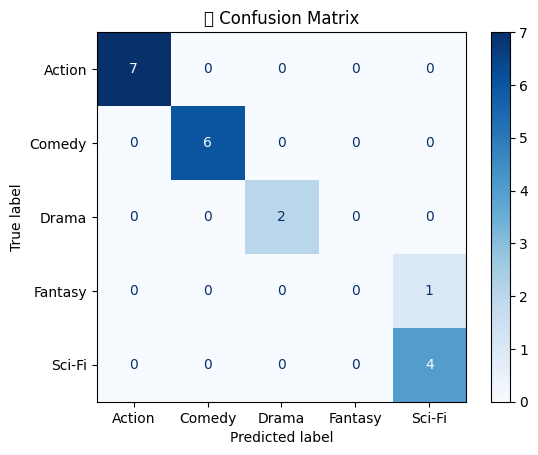

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

plt.figure(figsize=(8,6))
disp.plot(cmap="Blues", values_format='d')
plt.title("🎯 Confusion Matrix")
plt.show()

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr

def predict_genre(description):
    vector = vectorizer.transform([description])
    genre = model.predict(vector)[0]
    return f"🎬 Predicted Genre: {genre}"

interface = gr.Interface(fn=predict_genre,
                         inputs=gr.Textbox(lines=5, label="Movie Description"),
                         outputs=gr.Textbox(label="Predicted Genre"),
                         title="🎥 Movie Genre Predictor",
                         description="Enter a short movie description, and I'll guess its genre!")

interface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://47421ab53e0e88e136.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import gradio as gr

def predict_genre(description):
    vector = vectorizer.transform([description])
    genre = model.predict(vector)[0]
    return f"🎬 **Predicted Genre:** {genre}"

interface = gr.Interface(
    fn=predict_genre,
    inputs=gr.Textbox(lines=6, placeholder="Write a short movie plot...", label="🎥 Movie Description"),
    outputs=gr.Markdown(label="🧠 AI Prediction"),
    title="🎬 Movie Genre Classifier",
    description="Enter a description of a movie and let the AI guess its genre! Powered by ML + TF-IDF + Logistic Regression. 🚀",
    theme="soft",  # Можешь попробовать: "soft", "default", "monochrome", "huggingface"
    examples=[
        ["A team of explorers travels through a wormhole in space in an attempt to ensure humanity's survival."],
        ["A young couple from different social classes fall in love aboard an ill-fated voyage at sea."],
        ["A group of friends accidentally awaken evil spirits after reading from an ancient book."],
    ],
    allow_flagging="never"
)

interface.launch(share=True)  # share=True даст публичную ссылку!

/usr/local/lib/python3.11/dist-packages/gradio/interface.py:425: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated. Use `flagging_mode` instead.
  warnings.warn(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://456e4c63f22b1f98a3.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
